Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

Load dataset and prepare df. Keeping only those columns, that are not directly computed out of new deaths, and have the highest correlation

In [3]:
file_path = './data/owid-covid-data.csv'
date_column = 'date'
target_column = 'new_deaths'
df = pd.read_csv(file_path, parse_dates=[date_column])
len(set(df['iso_code'].values))

255

In [70]:
# Load the dfset
file_path = './data/owid-covid-data.csv'
date_column = 'date'
target_column = 'new_deaths'
df = pd.read_csv(file_path, parse_dates=[date_column]).drop(columns=['total_deaths','new_deaths_smoothed', 'total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million'])
date = df[date_column]
df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
df = df.select_dtypes(exclude=['object'])
correlation_with_target = df.drop(columns=[target_column]).corrwith(df[target_column])
most_corr = correlation_with_target.sort_values(ascending=False).index.tolist()
most_corr = list(set(most_corr[:10] + most_corr[-10:]))
df = df[most_corr].merge(df[target_column], left_index=True, right_index=True)
most_corr

['people_vaccinated',
 'total_vaccinations_per_hundred',
 'stringency_index',
 'weekly_hosp_admissions_per_million',
 'new_tests_smoothed',
 'people_vaccinated_per_hundred',
 'weekly_icu_admissions',
 'hosp_patients_per_million',
 'icu_patients',
 'tests_per_case',
 'people_fully_vaccinated',
 'total_cases_per_million',
 'total_boosters_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'total_boosters',
 'weekly_icu_admissions_per_million',
 'icu_patients_per_million',
 'total_cases',
 'total_vaccinations',
 'hosp_patients']

Plot the dataset

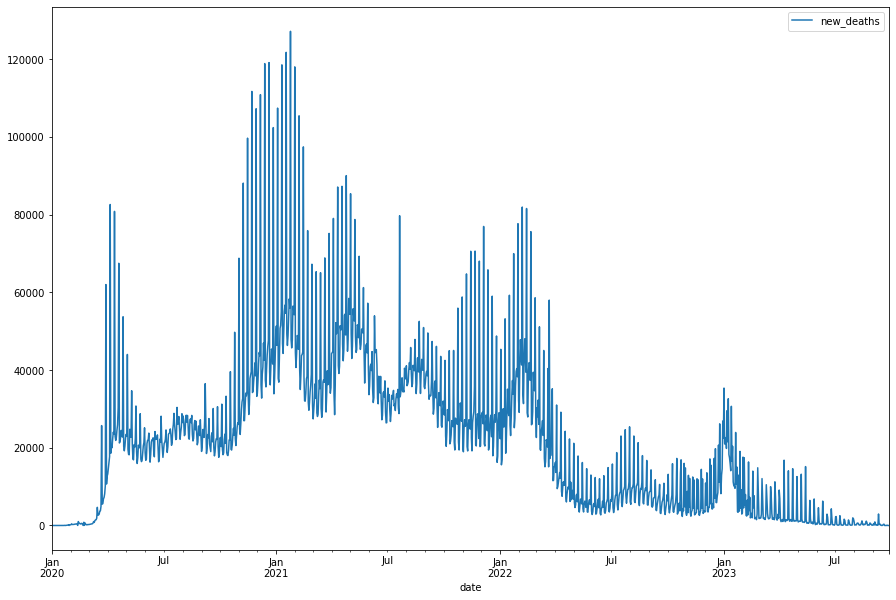

In [61]:
plot_cols = [target_column]
plot_features = df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(15, 10))


Display first values

In [62]:
df.head()


,total_cases,new_cases,new_cases_smoothed,new_deaths,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,...,49.100,87.847,6.380,151.72,1.624,1.730144e+08,0.0,0.00,0.00,0.000000
2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,...,49.100,87.847,6.380,151.72,1.624,1.730144e+08,0.0,0.00,0.00,0.000000
2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,...,4771.935,4875.729,535.783,16930.80,136.326,3.229163e+10,0.0,0.00,0.00,0.000000
2020-01-04,14.0,14.0,0.0,0.0,0.202,0.202,0.0,0.0,0.0,0.0,...,4771.935,4875.729,535.783,16930.80,136.326,3.229163e+10,0.0,0.00,0.00,0.000000
2020-01-05,9.0,0.0,0.0,15.0,0.017,0.000,0.0,0.0,0.0,0.0,...,4771.935,4875.729,535.783,16930.80,136.326,3.229163e+10,-12400.8,-367.44,-367.44,-787.480176


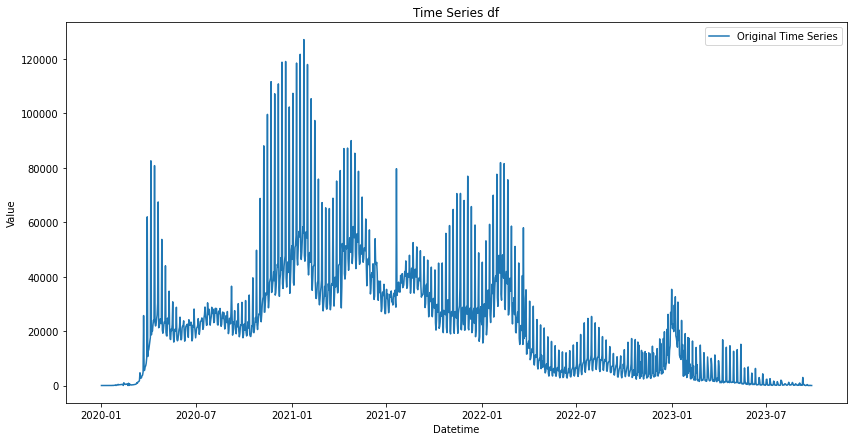

In [63]:
# Plot the entire time series df
plt.figure(figsize=(14, 7))
plt.plot(df[target_column], label='Original Time Series')
plt.title('Time Series df')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.legend()
plt.show()


Decompose the time series into trend, seasonal, and residual components

In [64]:
decomposition = seasonal_decompose(
    df[target_column], model='aditive', period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


Plot the original time series, trend, seasonal, and residual components

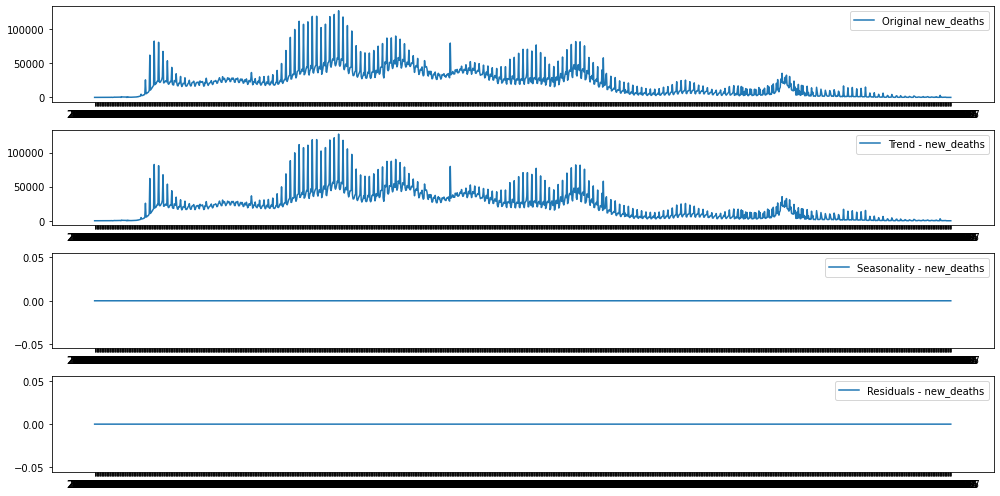

count      1366.000000
mean      21305.585652
std       19948.296074
min           0.000000
25%        4005.000000
50%       19927.000000
75%       32573.250000
max      127161.000000
Name: new_deaths, dtype: float64


In [50]:
plt.figure(figsize=(14, 7))

plt.subplot(411)
plt.plot(df[target_column], label=f'Original new_deaths')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label=f'Trend - new_deaths')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label=f'Seasonality - new_deaths')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label=f'Residuals - new_deaths')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Display summary statistics for the current target_column
print(df[target_column].describe())


In [71]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df
                        )
profile.to_file('profile_report.html')


Export report to file: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


In [67]:
import whylogs as why

profile = why.log(df).profile()

⚠️ No session found. Call whylogs.init() to initialize a session and authenticate. See https://docs.whylabs.ai/docs/whylabs-whylogs-init for more information.


In [68]:
from whylogs.api.fugue import fugue_profile

fugue_profile(pandas_df).to_pandas()

ModuleNotFoundError: No module named 'fugue'